----------------Médias de cada classe:-----------------
Classe setosa:  [5.006 3.428 1.462 0.246]
Classe Versicolor:  [5.936 2.77  4.26  1.326]
Classe Virginica:  [6.588 2.974 5.552 2.026]
Media total:  [5.84333333 3.05733333 3.758      1.19933333]
-----------------Calculando Sb-----------------
Sb setosa: 
[[ 35.05635556 -15.51857778  96.12586667  39.91288889]
 [-15.51857778   6.86968889 -42.55253333 -17.66844444]
 [ 96.12586667 -42.55253333 263.5808     109.44266667]
 [ 39.91288889 -17.66844444 109.44266667  45.44222222]]
Sb Versicolor: 
[[ 0.42935556 -1.33131111  2.32593333  0.58688889]
 [-1.33131111  4.12802222 -7.21206667 -1.81977778]
 [ 2.32593333 -7.21206667 12.6002      3.17933333]
 [ 0.58688889 -1.81977778  3.17933333  0.80222222]]
Sb Virginica: 
[[ 27.72642222  -3.10277778  66.7966      30.77955556]
 [ -3.10277778   0.34722222  -7.475       -3.44444444]
 [ 66.7966      -7.475      160.9218      74.152     ]
 [ 30.77955556  -3.44444444  74.152       34.16888889]]
-------------

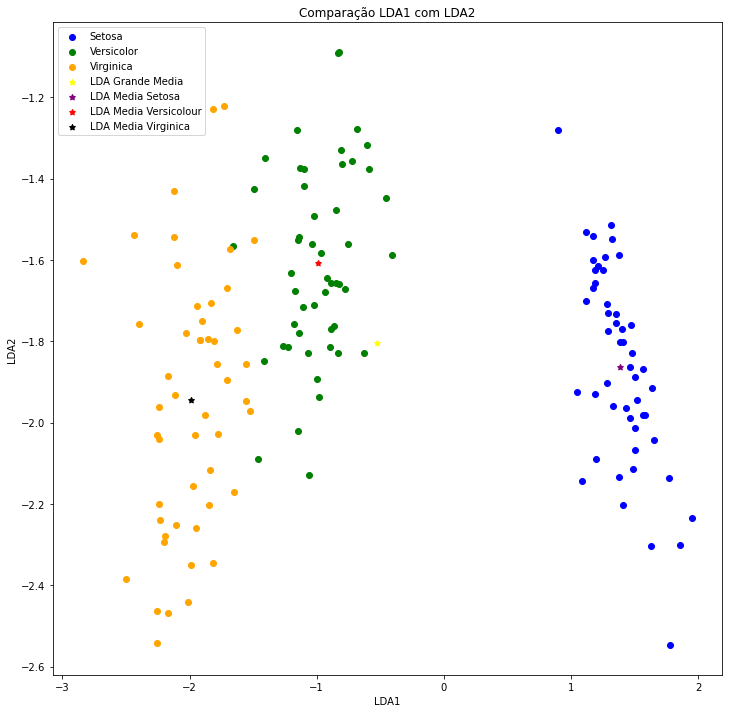

Autovalores:
 [4.22824171 0.24267075 0.0782095  0.02383509]
Autovetores:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [ 0.31548719 -0.3197231  -0.47983899  0.75365743]]
Autovetor com PCA [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]]
[-2.9369099744750807e-15, 8.881784197001252e-16]


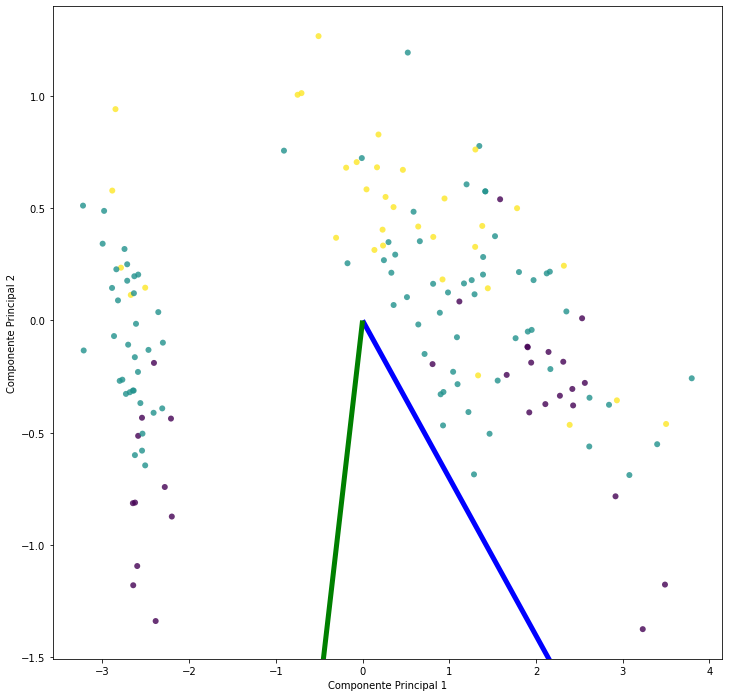

Autovetores com PCA [[ 0.75490915  0.65582938]
 [-0.04979831  0.99875929]]


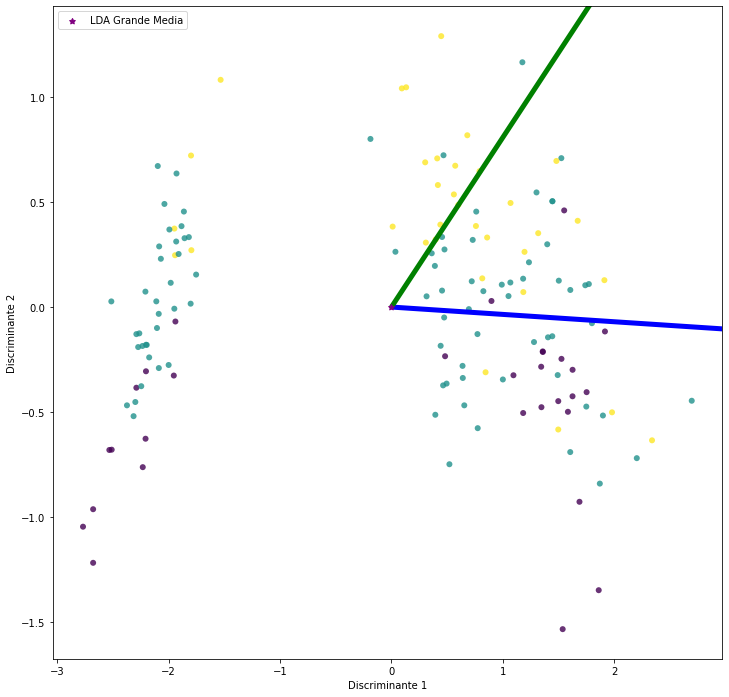

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from numpy import linalg as LA
from sklearn import datasets
#tratando dados do dataset IRIS
iris = datasets.load_iris()
ValoresIndiscriminados=np.array(list(iris.values())[0])
Classes=np.array(list(iris.values())[1])
Setosa,Versicolor, Virginica=np.array_split(Classes, 3)
Classe1, Classe2, Classe3=np.array_split(ValoresIndiscriminados, 3)
Classe1original=np.copy(Classe1)
Classe2original=np.copy(Classe2)
Classe3original=np.copy(Classe3)

#Calculando médias das classes
Mediaclasse1=np.mean(Classe1, axis=0)
Mediaclasse2=np.mean(Classe2, axis=0)
Mediaclasse3=np.mean(Classe3, axis=0)
print('----------------Médias de cada classe:-----------------')
print('Classe setosa: ',Mediaclasse1)
print('Classe Versicolor: ',Mediaclasse2)
print('Classe Virginica: ',Mediaclasse3)

#Subtraindo médias das classes
for i in range(len(Classe1)):
    Classe1[i]= Classe1[i]-Mediaclasse1
    Classe2[i]= Classe2[i]-Mediaclasse2
    Classe3[i]= Classe3[i]-Mediaclasse3


#Calculando matriz de covariancia de cada classe
Classe1cov=np.cov(Classe1.T)
Classe2cov=np.cov(Classe2.T)
Classe3cov=np.cov(Classe3.T)

#Somando matrizes de covariancia
Sw=50*(Classe1cov+Classe2cov+Classe3cov)

#Somando todas as médias
Mediatotal=(Mediaclasse1+Mediaclasse2+Mediaclasse3)/3
print('Media total: ', Mediatotal)

#Calculando a diferença das médias parciais para a média total
print('-----------------Calculando Sb-----------------')
S1=50*(np.c_[Mediaclasse1-Mediatotal]).T*np.c_[(Mediaclasse1-Mediatotal)]
S2=50*(np.c_[Mediaclasse2-Mediatotal]).T*np.c_[(Mediaclasse2-Mediatotal)]
S3=50*(np.c_[Mediaclasse3-Mediatotal]).T*np.c_[(Mediaclasse3-Mediatotal)]
print('Sb setosa: ')
print(S1)
print('Sb Versicolor: ')
print(S2)
print('Sb Virginica: ')
print(S3)

#Somando todos os S encontrados
Sb=(S1+S2+S3) 

print('----------------Sw------------------')
print(Sw)
print('----------------Sb------------------')
print(Sb)

#Calculando Sw(elevado a -1) *Sb
#Matriz=np.linalg.inv(Sw).dot(Sb)
Swinv=np.linalg.inv(Sw)
Matriz=np.matmul(Swinv,Sb)

eigenvalues,eigenvectors=LA.eig(Matriz)
    
print('autovalores: ', eigenvalues)
print('autovetores: ')
print(eigenvectors)

#selecionando componentes
maior=0
for i in range(len(eigenvalues)):
    if(abs(eigenvalues[i])>abs(eigenvalues[i])):
        maior=i

eigenvalue= eigenvalues[maior:maior+2]
eigenvector=eigenvectors[:,maior:maior+2]
print('------------LDA:------------')
print(eigenvector)


 #criando vetor finaldata
print('--------------------final data----------------------')
finaldata1= Classe1original.dot(eigenvector)

finaldata2= Classe2original.dot(eigenvector)
finaldata3= Classe3original.dot(eigenvector) 
Mediafinal_ajustada=Mediatotal.dot(eigenvector)
Mediaclasse1_ajustada=Mediaclasse1.dot(eigenvector)
Mediaclasse2_ajustada=Mediaclasse2.dot(eigenvector)
Mediaclasse3_ajustada=Mediaclasse3.dot(eigenvector)

plt.scatter(finaldata1[:,0],finaldata1[:,1],color='blue', label='Setosa')
plt.scatter(finaldata2[:,0],finaldata2[:,1],color='green', label='Versicolor')
plt.scatter(finaldata3[:,0],finaldata3[:,1],color='orange', label='Virginica')
plt.scatter(Mediafinal_ajustada[0],Mediafinal_ajustada[1],c='yellow',marker=(5, 1),label="LDA Grande Media")
plt.scatter(Mediaclasse1_ajustada[0],Mediaclasse1_ajustada[1],c='purple',marker=(5, 1),label="LDA Media Setosa")
plt.scatter(Mediaclasse2_ajustada[0],Mediaclasse2_ajustada[1],c='red',marker=(5, 1),label="LDA Media Versicolour")
plt.scatter(Mediaclasse3_ajustada[0],Mediaclasse3_ajustada[1],c='black',marker=(5, 1),label="LDA Media Virginica")

plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title("Comparação LDA1 com LDA2")

plt.legend()
plt.legend(loc='upper left')
plt.rcParams["figure.figsize"] = (12 ,12)
plt.show()








#Implementação do PCA como função
class PCA:
  def __init__(self, ncomponents):
    self.ncomponents = ncomponents
    self.components = None
    self.mean = None

  def fit(self,X):
    #media
    self.mean = np.mean(X,axis = 0)
    #subtrai a média para ser usada na covariancia 
    X = X - self.mean
    #covariancia
    cov = np.cov(X.T)
    #autovalores e autovetores
    eigvalue, eigvector = np.linalg.eig(cov)
    #ordena autovetores
    eigvector = eigvector.T
    idxs = np.argsort(eigvalue)[::-1]
    eigvalue = eigvalue[idxs]
    print("Autovalores:\r\n",eigvalue)
    eigvector = eigvector[idxs]
    print("Autovetores:\r\n",eigvector)
    #guarda n autovetores
    self.components = eigvector[0:self.ncomponents]

  def transform(self,X):
    #projeta o dado
    X = X - self.mean
    return np.dot(X, self.components.T)

from sklearn import datasets
data = datasets.load_iris()
Xpca = data.data
ypca = data.target

# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(Xpca)
Xpca_projected = pca.transform(Xpca)

#print("Numero de dimensões de X:", Xpca.shape)
#print("Numero de dimensões de X transformado:", Xpca_projected.shape)
print("Autovetor com PCA", pca.components )
x1pca = Xpca_projected[:, 0]
x2pca = Xpca_projected[:, 1]
eig_vec1 = pca.components[:, 0]
eig_vec2 = pca.components[:, 1]

y=np.stack((finaldata1[:,1],finaldata2[:,1],finaldata3[:,1]))

plt.scatter(
    x1pca, x2pca, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)
origem = [np.mean(x1pca), np.mean(x2pca)]
print(origem)
plt.quiver(*origem,*eig_vec1,color = 'blue', scale = 0.1, linewidth = 0.1)
plt.quiver(*origem,*eig_vec2,color = 'green', scale = 0.1)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

from pandas.core.indexes.multi import names_compat
#Implementação do LDA como função
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None
        self.mean_overall = None
    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(X, axis=0)
        self.mean_overall = mean_overall.T
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

# LDA com dados de entrada a partir do PCA
lda = LDA(2)
lda.fit(Xpca_projected, ypca)
# Xlda = data.data
# ylda = data.target
# lda.fit(Xlda, ylda)
# Xlda_projected = lda.transform(Xlda)
lda.fit(Xpca_projected, ypca)
Xlda_projected = lda.transform(Xpca_projected)

#print("Shape of X:", Xpca_projected.shape)
#print("Shape of transformed X:", Xlda_projected.shape)
print("Autovetores com PCA",lda.linear_discriminants)
x1 = Xlda_projected[:, 0]
x2 = Xlda_projected[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

origem = [0,0]
eig_vec1 = lda.linear_discriminants[:, 0]
eig_vec2 = lda.linear_discriminants[:, 1]

MediaSetosa = np.mean(Xpca_projected[0:50,0:2], axis = 0)
MediaVersicolour = (np.mean(Xpca_projected[50:100,0:2],axis = 0))
MediaVirginica = np.mean(Xpca_projected[100:150,0:2],axis = 0)


#transforma a grande média
GM = lda.mean_overall.dot(lda.linear_discriminants.T)
GM.shape = (1, 2)
xgm,ygm = np.split(GM,2,axis=1)
MS = MediaSetosa.dot(lda.linear_discriminants.T)
MS.shape = (1, 2)
xms,yms = np.split(MS,2,axis=1)
MV = MediaVersicolour.dot(lda.linear_discriminants.T)
MV.shape = (1, 2)
xmv,ymv = np.split(MV,2,axis=1)
MVi = MediaVirginica.dot(lda.linear_discriminants.T)
MVi.shape = (1, 2)
xmvi,ymvi = np.split(MVi,2,axis=1)

plt.quiver(*origem,*eig_vec1,color = 'blue', scale = 0.1,)
plt.quiver(*origem,*eig_vec2,color = 'green', scale = 0.1)
plt.scatter(xgm,ygm,c='purple',marker=(5, 1),label="LDA Grande Media")
plt.xlabel("Discriminante 1")
plt.ylabel("Discriminante 2")
plt.legend(loc='upper left')
plt.show()



